# 프로젝트명 : 1주차 제조데이터 실습코드

### 📌 프로젝트 소개

- 제품 및 공장의 불량률을 나타내는 제조 데이터는 민감한 정보이므로 기업이 공개적으로 공유하지 않는 경우가 많습니다.
- 그럼에도 불구하고 제조 공정의 불량률을 줄이거나 개선하는 데 도움이 될 수 있으므로 중요한 데이터입니다.
- 실제로 현장에서의 목표는 일반적인 데이터 분석처럼 단순히 고성능 예측 모델을 개발하는 것이 아닙니다. 대신 `어떤 요인이 결함에 영향을 미치는지 이해하고 이를 줄이기 위한 효과적인 전략을 결정`하는 데 중점을 둡니다.
- 따라서 데이터 분석가의 임무는 `다양한 데이터를 분석하고 제품 불량 발생률을 줄일 수 있는 솔루션을 제공`하는 것입니다.


### ✅ 데이터 안내
- 본 실습에 사용된 데이터는 실제 제조과정에서 나온 데이터로 익명처리되어 어느 회사의 제품인지 식별이 불가능합니다.
- 제조업 데이터를 다루다 보면 제조업 분야에서 흔히 발생하는 `데이터 불균형`을 자주 접하게 됩니다.
- 비식별화된 제조 데이터에서 `종속변수 Y`는 `제품의 불량 여부`를 나타냅니다.
- X로 표시된 나머지 변수는 독립변수입니다.
|


![워크플로우](https://file.notion.so/f/f/4e4750b9-2973-47f2-9fe5-8330ce1f2c19/475398a6-c3b8-4335-aa31-21706433bb30/%E1%84%91%E1%85%B3%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%8B%E1%85%AF%E1%84%8F%E1%85%B3.png?id=394533fb-064a-49a7-b2a8-8ef44889237d&table=block&spaceId=4e4750b9-2973-47f2-9fe5-8330ce1f2c19&expirationTimestamp=1715745600000&signature=6FQpuNkoG-UJfp-FiIfFnwlPC7A7iDe-0RR1PbO-ixg&downloadName=%E1%84%91%E1%85%B3%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%8B%E1%85%AF%E1%84%8F%E1%85%B3.png)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('C:\\Users\\USER\\projects\\data_study\\Data\\1주_실습데이터.csv')

print(data.head())

         X1        X2        X3        X4        X5        X6        X7  \
0  0.202296  0.003560  0.411261  0.015348  0.693147  0.036360  0.343512   
1  0.006836  0.007688  0.597304  0.015348  0.686838  0.067407  0.347869   
2  0.609621  0.001461  0.466186  0.015348  0.693090  0.018944  0.345032   
3  0.074007  0.003072  0.535876  0.015348  0.693147  0.031475  0.347502   
4  0.198356  0.007020  0.416238  0.015348  0.686838  0.061888  0.347441   

         X8        X9       X10  ...       X12       X13       X14       X15  \
0  0.028087  0.681974  0.295769  ...  0.682731  0.249262  0.681974  0.016330   
1  0.028640  0.497403  0.297943  ...  0.680891  0.249262  0.497403  0.670040   
2  0.024502  0.647685  0.298255  ...  0.685525  0.249262  0.647685  0.648486   
3  0.025393  0.587787  0.296057  ...  0.677980  0.249262  0.575364  0.632563   
4  0.028450  0.537143  0.298167  ...  0.673286  0.249262  0.537143  0.671124   

        X16       X17       X18       X19       X20  Y  
0  0.242926

In [3]:
print(data.head())  # Display the first few rows of the dataframe
print(data.describe())  # Summary statistics of the numerical columns
print(data.info())  # Information about the dataframe


         X1        X2        X3        X4        X5        X6        X7  \
0  0.202296  0.003560  0.411261  0.015348  0.693147  0.036360  0.343512   
1  0.006836  0.007688  0.597304  0.015348  0.686838  0.067407  0.347869   
2  0.609621  0.001461  0.466186  0.015348  0.693090  0.018944  0.345032   
3  0.074007  0.003072  0.535876  0.015348  0.693147  0.031475  0.347502   
4  0.198356  0.007020  0.416238  0.015348  0.686838  0.061888  0.347441   

         X8        X9       X10  ...       X12       X13       X14       X15  \
0  0.028087  0.681974  0.295769  ...  0.682731  0.249262  0.681974  0.016330   
1  0.028640  0.497403  0.297943  ...  0.680891  0.249262  0.497403  0.670040   
2  0.024502  0.647685  0.298255  ...  0.685525  0.249262  0.647685  0.648486   
3  0.025393  0.587787  0.296057  ...  0.677980  0.249262  0.575364  0.632563   
4  0.028450  0.537143  0.298167  ...  0.673286  0.249262  0.537143  0.671124   

        X16       X17       X18       X19       X20  Y  
0  0.242926

In [4]:
X = data.drop('Y', axis=1)  # Independent variables
y = data['Y']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9997058823529412
Confusion Matrix:
 [[93883     0]
 [   31 11486]]


## Accuracy: 
Accuracy is a measure of how often the classifier is correct. It's calculated as the ratio of the number of correctly predicted instances (both true positives and true negatives) to the total number of instances. In this case, the accuracy is approximately 99.97%, which indicates that the classifier is very accurate in predicting whether a process has a defect or not.

## Confusion Matrix:

- True Positives (TP): These are the cases where the model correctly predicted the positive class (defective process). In your case, there are 11,486 instances where the model correctly predicted that the process has a defect.
- True Negatives (TN): These are the cases where the model correctly predicted the negative class (non-defective process). In your case, there are 93,883 instances where the model correctly predicted that the process does not have a defect.
- False Positives (FP): These are the cases where the model incorrectly predicted the positive class (defective process) when it's actually negative. In your case, there are 0 instances where the model incorrectly predicted a defect when there isn't one.
- False Negatives (FN): These are the cases where the model incorrectly predicted the negative class (non-defective process) when it's actually positive. In your case, there are 31 instances where the model incorrectly predicted that the process doesn't have a defect when it actually does.

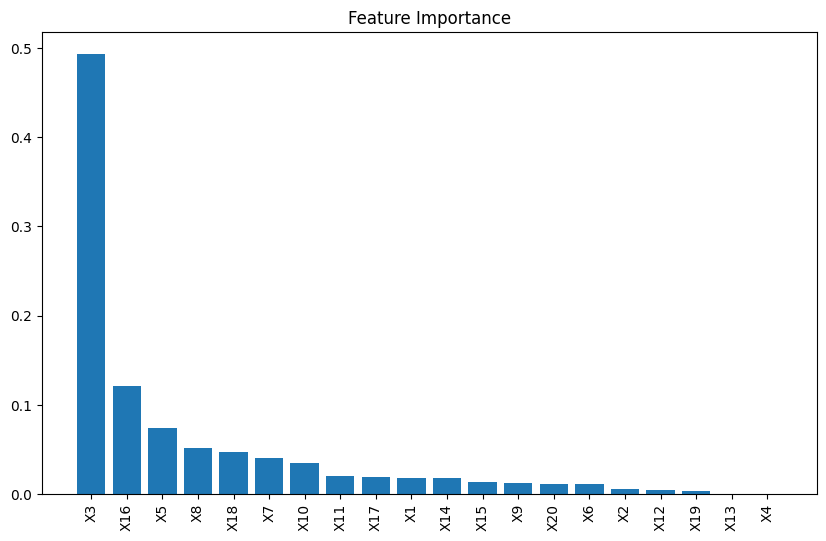

In [7]:
import numpy as np
# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()


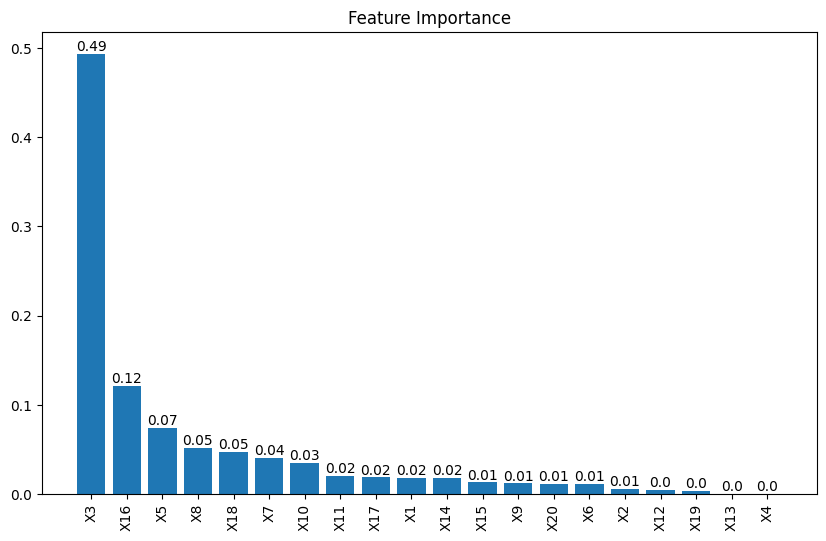

In [8]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)

# Add exact numerical values on top of each bar
for i in range(len(importances)):
    plt.text(i, importances[indices][i], round(importances[indices][i], 2), ha='center', va='bottom')

plt.show()


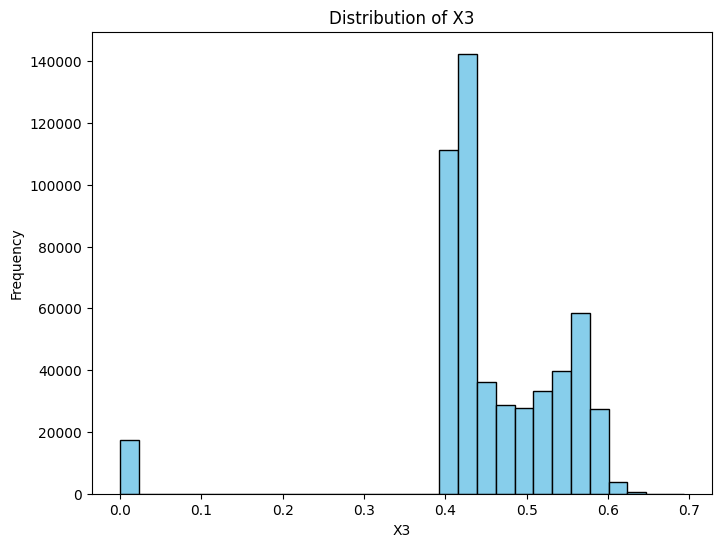

C:\Users\USER\AppData\Local\Temp\ipykernel_23816\2409242026.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Y', y='X3', data=data, palette="Set3")


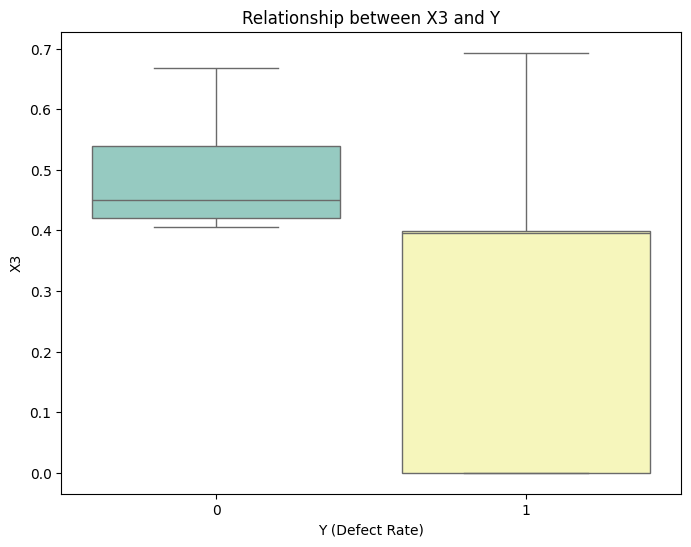

In [9]:
import seaborn as sns
# Visualize the distribution of X3
plt.figure(figsize=(8, 6))
plt.hist(data['X3'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of X3")
plt.xlabel("X3")
plt.ylabel("Frequency")
plt.show()

# Explore the relationship between X3 and the target variable Y
plt.figure(figsize=(8, 6))
sns.boxplot(x='Y', y='X3', data=data, palette="Set3")
plt.title("Relationship between X3 and Y")
plt.xlabel("Y (Defect Rate)")
plt.ylabel("X3")
plt.show()


In [10]:
# Summary statistics for X3
print("Summary Statistics for X3:")
print(data['X3'].describe())


Summary Statistics for X3:
count    527000.000000
mean          0.455679
std           0.105150
min           0.000000
25%           0.415990
50%           0.435739
75%           0.530429
max           0.693147
Name: X3, dtype: float64


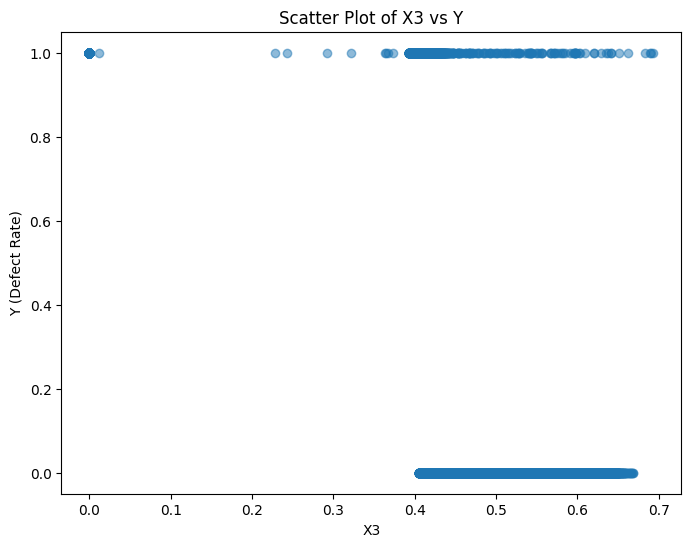

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(data['X3'], data['Y'], alpha=0.5)
plt.title("Scatter Plot of X3 vs Y")
plt.xlabel("X3")
plt.ylabel("Y (Defect Rate)")
plt.show()


In [12]:
# Calculate correlation coefficient between X3 and Y
correlation = data['X3'].corr(data['Y'])
print("Correlation between X3 and Y:", correlation)


Correlation between X3 and Y: -0.5901594868105061


In [13]:
# Create bins for segmentation
bins = pd.cut(data['X3'], bins=5)  # Adjust the number of bins as needed

# Calculate defect rates within each segment
segment_defect_rates = data.groupby(bins)['Y'].mean()

print("Defect Rates by X3 Segments:")
print(segment_defect_rates)


Defect Rates by X3 Segments:
X3
(-0.000693, 0.139]    1.000000
(0.139, 0.277]        1.000000
(0.277, 0.416]        0.349074
(0.416, 0.555]        0.002442
(0.555, 0.693]        0.000431
Name: Y, dtype: float64


### Interpreting the results:

- The first two segments, with "X3" values ranging from (-0.000693 to 0.139] and (0.139 to 0.277], both have a defect rate of 1.0. This suggests that processes falling within these ranges of "X3" values are highly likely to have defects.
- As the "X3" values increase beyond 0.277, the defect rates start to decrease significantly. For example, the defect rate drops to approximately 35% in the segment with "X3" values ranging from (0.277 to 0.416].
- Furthermore, for higher "X3" values, the defect rates decrease even more drastically. For instance, the defect rate is only around 0.24% in the segment with "X3" values ranging from (0.416 to 0.555], and it decreases to about 0.04% in the segment with "X3" values ranging from (0.555 to 0.693].
### Insights:
- There seems to be a clear inverse relationship between the "X3" values and the defect rates. As "X3" values increase, the defect rates decrease.
- Processes with lower "X3" values are more likely to have defects, while processes with higher "X3" values are less likely to have defects.

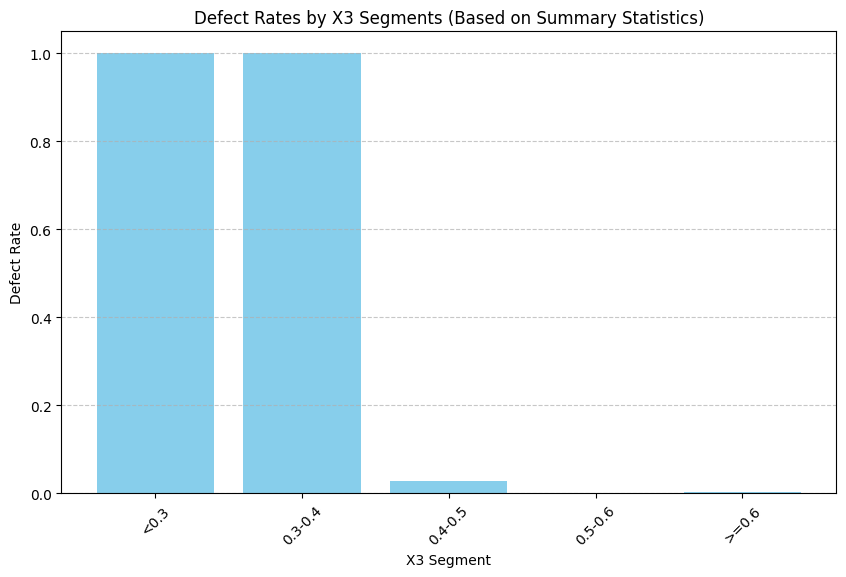

In [14]:
# Define bins based on summary statistics
bins = [0, 0.3, 0.4, 0.5, 0.6, 0.7]  # Adjust the bin edges as needed based on the summary statistics

# Create bins for segmentation
bins_labels = ['<0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '>=0.6']
data['X3 Segment'] = pd.cut(data['X3'], bins=bins, labels=bins_labels)

# Calculate defect rates within each segment
segment_defect_rates_summary = data.groupby('X3 Segment')['Y'].mean()

# Plot the defect rates by X3 segments
plt.figure(figsize=(10, 6))
plt.bar(segment_defect_rates_summary.index, segment_defect_rates_summary, color='skyblue')
plt.title("Defect Rates by X3 Segments (Based on Summary Statistics)")
plt.xlabel("X3 Segment")
plt.ylabel("Defect Rate")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1. **Find the segment with the lowest defect rate**:
   - The code `segment_defect_rates.idxmin()` finds the index (segment) with the lowest defect rate in the `segment_defect_rates` Series.
   - `segment_defect_rates` is a Series where the index represents the intervals of 'X3' segments, and the values represent the defect rates within each segment.

2. **Extract the midpoint of the optimal segment(s)**:
   - If there's only one optimal segment (i.e., the defect rate is lowest within a single segment), we directly extract the midpoint of that segment as the optimal value for 'X3'.
   - If there are multiple optimal segments (i.e., multiple segments with the same lowest defect rate), we iterate over each segment and extract the midpoint of each segment.

3. **Handle the case of a single optimal value**:
   - The `if isinstance(min_defect_rate_segment, float):` condition checks if the optimal segment is represented by a single float value (which indicates there's only one optimal segment).
   - If there's only one optimal segment, we directly assign the midpoint of that segment to `optimal_X3_values`.

4. **Output the optimal values for 'X3'**:
   - Finally, we print the optimal values for 'X3' to enhance the defect rate. These values represent the midpoints of the segment(s) with the lowest defect rate.


1. **Finding the Segment(s) with the Lowest Defect Rate:**
    - `segment_defect_rates.idxmin()`: Finds the index label(s) where the minimum defect rate occurs in the `segment_defect_rates` Series or DataFrame. The result is stored in `min_defect_rate_segment`.

2. **Extracting Optimal X3 Values:**
    - If `min_defect_rate_segment` is a float (indicating there's only one optimal segment), its value is directly assigned to `optimal_X3_values`.
    - If `min_defect_rate_segment` is not a float (indicating multiple optimal segments), the midpoints of those segments are extracted using a list comprehension: `[interval.mid for interval in min_defect_rate_segment]`. These midpoints are stored in `optimal_X3_values`.

3. **Printing the Optimal Values for X3:**
    - Finally, the optimal values for X3 to enhance the defect rate are printed using `print("Optimal values for X3 to enhance defect rate:", optimal_X3_values)`.


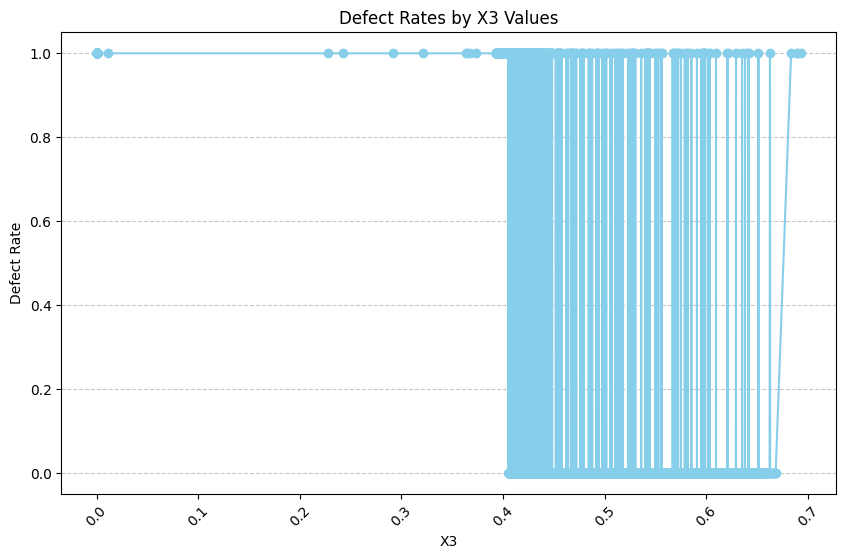

In [17]:
# Sort the data by 'X3' values
data_sorted = data.sort_values(by='X3')

# Plot the defect rates by 'X3' values
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['X3'], data_sorted['Y'], marker='o', color='skyblue', linestyle='-')
plt.title("Defect Rates by X3 Values")
plt.xlabel("X3")
plt.ylabel("Defect Rate")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [18]:
# Filter the data where the defect rate is 100%
defect_rate_100 = data[data['Y'] == 1]

# Find the minimum 'X3' value within the filtered dataset
min_X3_defect_rate_100 = defect_rate_100['X3'].min()

print("Minimum X3 value with 100% defect rate:", min_X3_defect_rate_100)


Minimum X3 value with 100% defect rate: 0.0


In [19]:
# Filter the data to exclude observations with a defect rate of 1
data_filtered = data[data['Y'] < 1]

# Find the first minimum 'X3' value without a 100% defect rate
first_min_X3_without_100_error = data_filtered['X3'].min()

# Find the defect rate of the first minimum X3 value without 100% defect rate
defect_rate_first_min_X3_without_100_error = data[data['X3'] == first_min_X3_without_100_error]['Y'].values[0]

print("First minimum X3 value without 100% defect rate:", first_min_X3_without_100_error)
print("Defect rate of the first minimum X3 value without 100% defect rate:", defect_rate_first_min_X3_without_100_error)

First minimum X3 value without 100% defect rate: 0.40533963
Defect rate of the first minimum X3 value without 100% defect rate: 0


In [20]:
# Find the most frequent value of X3
print(data['X3'].mode()[0])

0.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


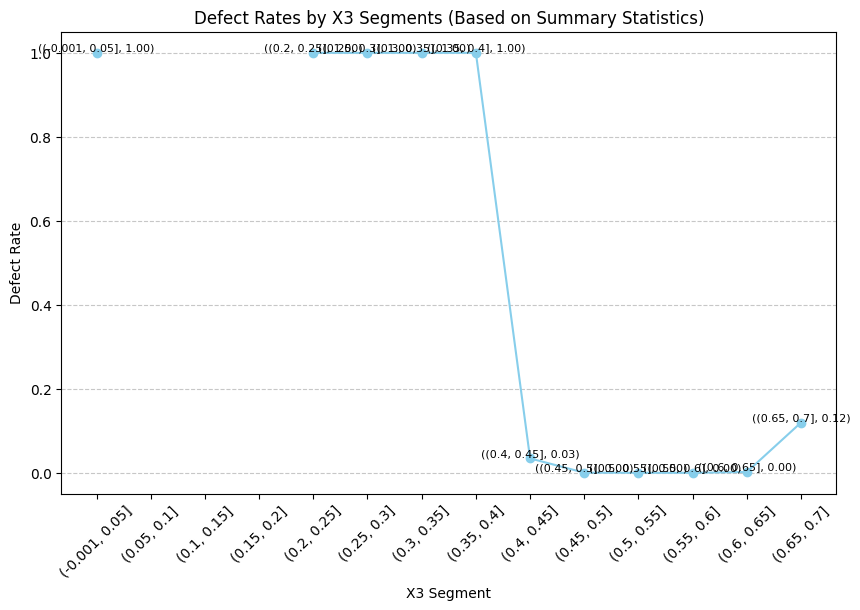

In [32]:
# Define the segment intervals
segment_intervals = np.arange(0, 1.05, 0.05)

# Group the data by X3 column based on the defined segment intervals
data['X3_segment'] = pd.cut(data['X3'], bins=segment_intervals, include_lowest=True)

# Calculate the mean defect rate for each X3 segment
segment_defect_rates_summary = data.groupby('X3_segment')['Y'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(segment_defect_rates_summary.index.astype(str), segment_defect_rates_summary.values, marker='o', color='skyblue', linestyle='-')
plt.title("Defect Rates by X3 Segments (Based on Summary Statistics)")
plt.xlabel("X3 Segment")
plt.ylabel("Defect Rate")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding index annotations with both X and Y values
for x, y in zip(segment_defect_rates_summary.index.astype(str), segment_defect_rates_summary.values):
    plt.text(x, y, f"({x}, {y:.2f})", ha='center', va='bottom', fontsize=8)

plt.show()


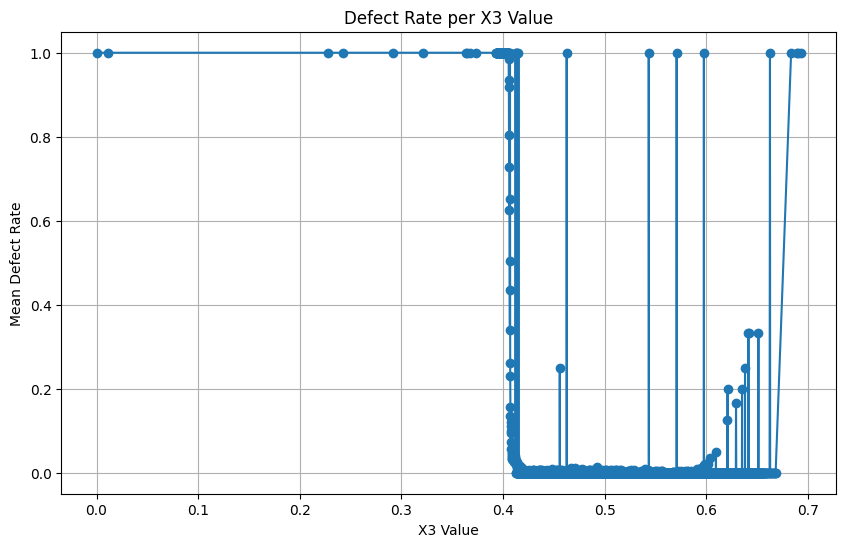

In [30]:
# Group the data by X3 column and calculate the mean defect rate for each X3 value
mean_defect_rate_per_X3 = data.groupby('X3')['Y'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_defect_rate_per_X3.index, mean_defect_rate_per_X3.values, marker='o', linestyle='-')
plt.title("Defect Rate per X3 Value")
plt.xlabel("X3 Value")
plt.ylabel("Mean Defect Rate")
plt.grid(True)
plt.show()


In [48]:
import pandas as pd


# Initialize a dictionary to store counts for each value of 'X3'
counts = {}

# Group the data by 'X3' and check if all 'y' values are 1 within each group
for x17_value, group_data in data.groupby('X17'):
    if (group_data['Y'] == 1).all():
        counts[x17_value] = len(group_data)

# Create a DataFrame from the counts dictionary
counts_df = pd.DataFrame(counts.items(), columns=['X17', 'Count'])

# Sort the DataFrame by counts in descending order
counts_df = counts_df.sort_values(by='Count', ascending=False)

# Print the 'X3' values grouped by their counts
print("X3 values grouped by their counts where all y values are 1:")
for count, x3_values in counts_df.groupby('Count')['X17']:
    print(f"Count = {count}: X17 values = {list(x3_values)}")

X3 values grouped by their counts where all y values are 1:
Count = 1: X17 values = [0.56774694, 0.5660522, 0.56731254, 0.69296205, 0.69296634, 0.5671515, 0.56706846, 0.5670049, 0.56658, 0.56649935, 0.56546545, 0.6930331, 0.6877192, 0.69304603, 0.5649518, 0.5643644, 0.564095, 0.56380844, 0.6930848, 0.5490566, 0.6916695, 0.68297946, 0.57238674, 0.54875326, 0.5820545, 0.5900107, 0.593177, 0.5958186, 0.5958613, 0.60966265, 0.61929584, 0.6226388, 0.6315717, 0.6365837, 0.67918885, 0.63913363, 0.641514, 0.6418313, 0.64802015, 0.66284555, 0.6662718, 0.67131346, 0.6741342, 0.67771447, 0.63606423]
Count = 2: X17 values = [0.6930482, 0.6930654, 0.69310415, 0.692975, 0.0, 0.5556969, 0.5642983]
Count = 3: X17 values = [0.6929922]
Count = 4: X17 values = [0.5670538]
Count = 5: X17 values = [0.5639726, 0.5669073]
Count = 6: X17 values = [0.5669878]
Count = 13: X17 values = [0.5638501]
Count = 15: X17 values = [0.56678516]
Count = 16: X17 values = [0.69302666]
Count = 18: X17 values = [0.6930503]
Cou

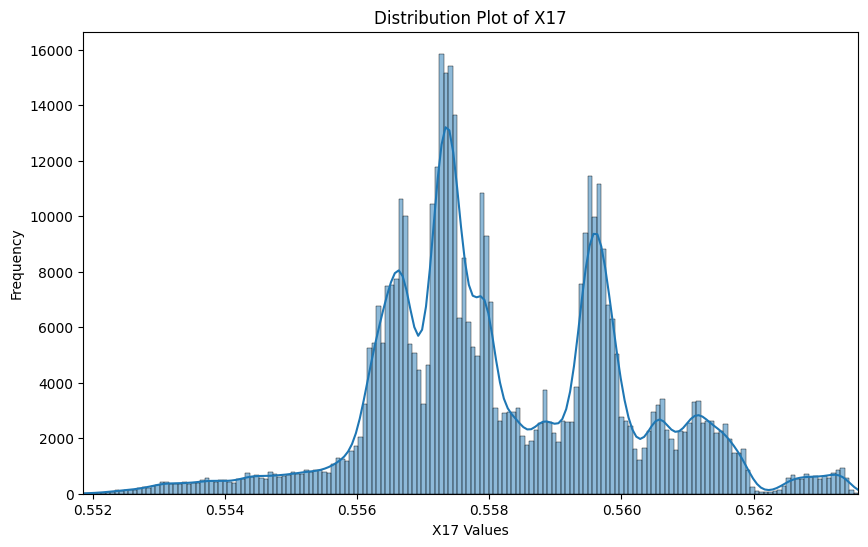

In [50]:
import seaborn as sns

# Get the min and max values of X17
x17_min = data_filtered['X17'].min()
x17_max = data_filtered['X17'].max()

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered['X17'], kde=True)
plt.title("Distribution Plot of X17")
plt.xlabel("X17 Values")
plt.ylabel("Frequency")
plt.xlim(x17_min, x17_max)  # Set x-axis limits
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

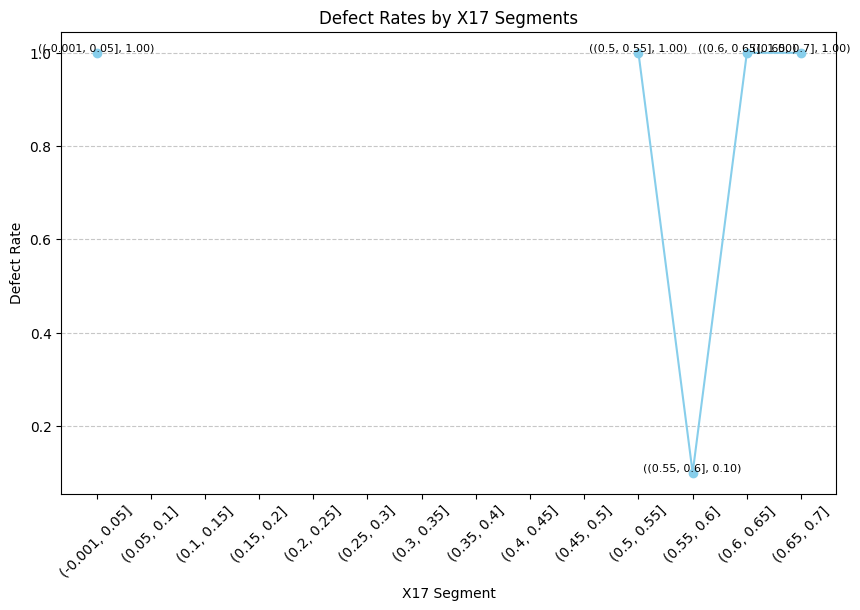

In [75]:
# Define the segment intervals
segment_intervals = np.arange(0, 1.05, 0.05)

# Group the data by X17 column based on the defined segment intervals
data['X17_segment'] = pd.cut(data['X17'], bins=segment_intervals, include_lowest=True)

# Calculate the mean defect rate for each X17 segment
segment_defect_rates_summary = data.groupby('X17_segment')['Y'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(segment_defect_rates_summary.index.astype(str), segment_defect_rates_summary.values, marker='o', color='skyblue', linestyle='-')
plt.title("Defect Rates by X17 Segments")
plt.xlabel("X17 Segment")
plt.ylabel("Defect Rate")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding index annotations with both X and Y values
for x, y in zip(segment_defect_rates_summary.index.astype(str), segment_defect_rates_summary.values):
    plt.text(x, y, f"({x}, {y:.2f})", ha='center', va='bottom', fontsize=8)

plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


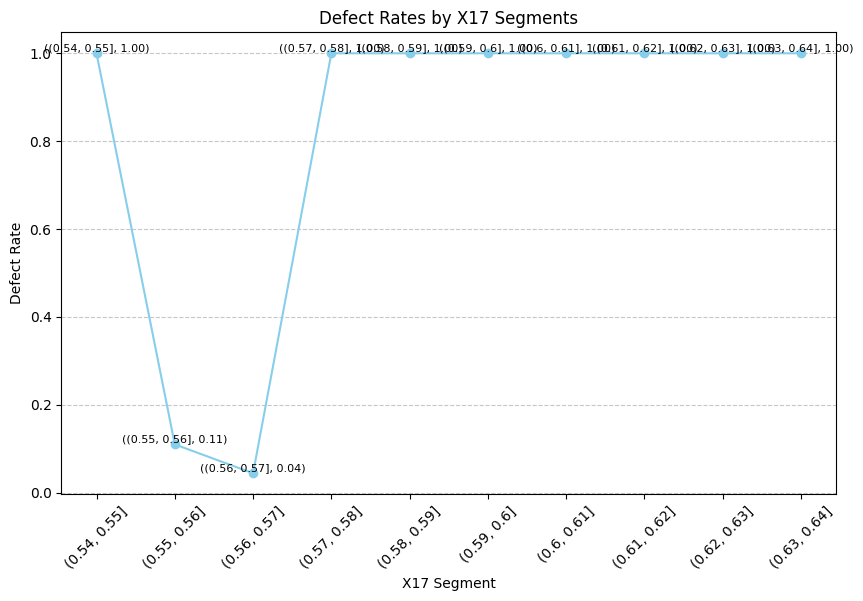

In [76]:
# Define the segment intervals
segment_intervals = np.arange(0.45,0.65, 0.01)

# Group the data by X17 column based on the defined segment intervals
data['X17_segment'] = pd.cut(data['X17'], bins=segment_intervals, include_lowest=True)

# Calculate the mean defect rate for each X17 segment
segment_defect_rates_summary = data.groupby('X17_segment')['Y'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(segment_defect_rates_summary.index.astype(str), segment_defect_rates_summary.values, marker='o', color='skyblue', linestyle='-')
plt.title("Defect Rates by X17 Segments")
plt.xlabel("X17 Segment")
plt.ylabel("Defect Rate")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding index annotations with both X and Y values
for x, y in zip(segment_defect_rates_summary.index.astype(str), segment_defect_rates_summary.values):
    plt.text(x, y, f"({x}, {y:.2f})", ha='center', va='bottom', fontsize=8)

plt.show()

In [73]:
# Sort the data by X17 in ascending order
data_sorted = data.sort_values(by='X17')

# Initialize the minimum X17 value
min_X17_value = None

# Iterate through unique X17 values in ascending order
for x17_value in data_sorted['X17'].unique():
    # Filter the data where X17 values are greater than the current value
    filtered_data = data_sorted[data_sorted['X17'] > x17_value]
    
    # Check if all Y values for the filtered data are equal to 1
    if (filtered_data['Y'] == 1).all():
        min_X17_value = x17_value
        break

if min_X17_value is not None:
    print("The minimum value of X17 where all subsequent X17 values have Y=1 is:", min_X17_value)
else:
    print("There are no X17 values where all subsequent X17 values have Y=1.")


The minimum value of X17 where all subsequent X17 values have Y=1 is: 0.5635855


In [74]:
# Filter the data where X17 values exceed 0.5635855
data_exceeding_threshold = data[data['X17'] > 0.5635855]

if data_exceeding_threshold.empty:
    print("There are no X17 values exceeding the threshold.")
elif (data_exceeding_threshold['Y'] == 1).all():
    print("All Y values for X17 values exceeding 0.5635855 are equal to 1.")
else:
    print("Not all Y values for X17 values exceeding 0.5635855 are equal to 1.")


All Y values for X17 values exceeding 0.5635855 are equal to 1.


In [77]:
# Filter the data where X3 values are smaller than 0.40533963
data_X3_below_threshold = data[data['X3'] < 0.40533963]

# Filter the remaining data where X17 values exceed 0.5635855
data_X17_exceeding_threshold = data_X3_below_threshold[data_X3_below_threshold['X17'] > 0.5635855]

if data_X17_exceeding_threshold.empty:
    print("There are no data points where X3 values are smaller than 0.40533963 and X17 values exceed 0.5635855.")
elif (data_X17_exceeding_threshold['Y'] == 1).all():
    print("All data points where X3 values are smaller than 0.40533963 and X17 values exceed 0.5635855 have Y=1.")
else:
    print("Not all data points where X3 values are smaller than 0.40533963 and X17 values exceed 0.5635855 have Y=1.")


All data points where X3 values are smaller than 0.40533963 and X17 values exceed 0.5635855 have Y=1.


In [78]:
# Filter the data where X3 values are smaller than 0.40533963
data_X3_below_threshold = data[data['X3'] < 0.40533963]

# Filter the remaining data where X17 values exceed 0.5635855
data_X17_exceeding_threshold = data_X3_below_threshold[data_X3_below_threshold['X17'] > 0.5635855]

# Filter the data where Y values are equal to 1
data_Y_equals_1 = data[data['Y'] == 1]

# Calculate the ratio
ratio = len(data_X17_exceeding_threshold) / len(data_Y_equals_1)

print("Ratio of data meeting the condition to total data with Y=1 value:", ratio)

Ratio of data meeting the condition to total data with Y=1 value: 0.05231578947368421


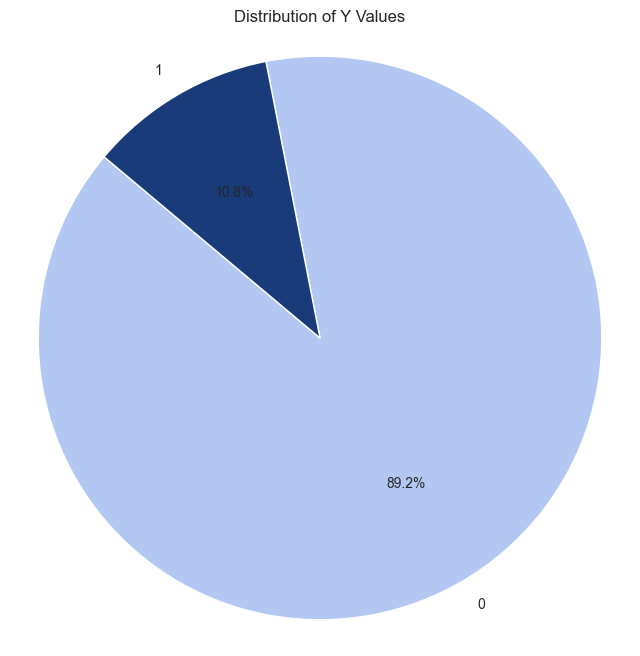

In [101]:
# Define custom colors
colors = ['#B2C8F2', '#193B79']

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Y Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

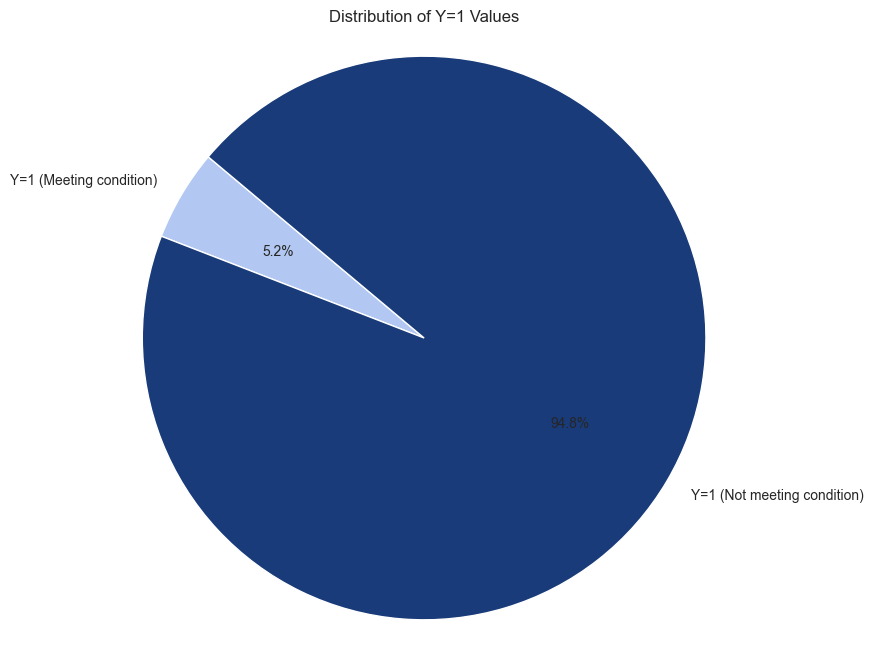

In [102]:
# Filter the data where X3 values are smaller than 0.40533963 and X17 values exceed 0.5635855
filtered_data = data[(data['X3'] < 0.40533963) & (data['X17'] > 0.5635855)]

# Count the occurrences of Y=1 values in the filtered dataset
filtered_y1_count = filtered_data[filtered_data['Y'] == 1]['Y'].count()

# Count the occurrences of Y=1 values where the condition is not met
unfiltered_y1_count = data[(data['Y'] == 1) & ~((data['X3'] < 0.40533963) & (data['X17'] > 0.5635855))]['Y'].count()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie([filtered_y1_count, unfiltered_y1_count], labels=['Y=1 (Meeting condition)', 'Y=1 (Not meeting condition)'], autopct='%1.1f%%', startangle=140, colors=['#B2C8F2', '#193B79'])
plt.title('Distribution of Y=1 Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
